In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import plot_importance

In [2]:
train = pd.read_csv('Train_maskedv2.csv')
train.head()

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [3]:
test=pd.read_csv('Test_maskedv2.csv')
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.04172,8037.06199,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,...,0.000420,0.011485,0,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007
1,01V40KO,1829.71944,7494.86917,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,...,0.000000,0.000160,0,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716
2,01ZHVW0,1721.99009,5847.43254,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,...,0.000631,0.006504,0,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954
3,028YQJX,12388.02257,52211.66859,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,...,0.000593,0.008330,0,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470
4,02G8W11,1754.25716,4266.57609,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,...,0.000234,0.016846,0,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227


In [4]:



#using a heatmap to study numeric fearturs
train_data = train.drop(['ward'],axis=1)
test_data = test.drop(['ward'],axis=1)

In [5]:
train_data['total_households']=train_data['total_households']*1000
train_data['total_households']=train_data['total_households'].apply(np.floor)
train_data['total_individuals']=train_data['total_individuals']*1000
train_data['total_individuals']=train_data['total_individuals'].apply(np.floor)
test_data['total_households']=test_data['total_households']*1000
test_data['total_households'].apply(np.floor)
test_data['total_individuals']=test_data['total_individuals']*1000
test_data['total_individuals'].apply(np.floor)
train_data.head()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,13569978.0,39024030.0,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,13593882.0,32879946.0,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,2698300.0,8261710.0,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,1965966.0,9069776.0,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,1852078.0,9908844.0,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [6]:
#convert select columns to intergers
train_data['total_households']=train_data['total_households'].astype(np.int64)
train_data['total_individuals']=train_data['total_individuals'].astype(np.int64)
test_data['total_households']=test_data['total_households'].astype(np.int64)
test_data['total_individuals']=test_data['total_individuals'].astype(np.int64)

In [7]:
train_data.head()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,13569978,39024030,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,13593882,32879946,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,2698300,8261710,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,1965966,9069776,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,1852078,9908844,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [8]:
test_data.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,2514041,8037061,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,0.010995,...,0.000420,0.011485,0,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007
1,1829719,7494869,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,0.005074,...,0.000000,0.000160,0,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716
2,1721990,5847432,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,0.004769,...,0.000631,0.006504,0,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954
3,12388022,52211668,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,0.065487,...,0.000593,0.008330,0,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470
4,1754257,4266576,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,0.000000,...,0.000234,0.016846,0,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227


In [9]:
test_data.describe()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
count,1.102000e+03,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,...,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,2.954164e+06,1.123846e+07,0.554544,0.237620,0.045786,0.003852,0.005205,0.026109,0.026799,0.030418,...,0.000697,0.008765,0.0,0.022219,0.672871,0.228805,0.004585,0.087391,0.006347,0.791468
std,2.668062e+06,8.912096e+06,0.282261,0.314265,0.078767,0.009472,0.015252,0.067398,0.040966,0.049703,...,0.001423,0.014138,0.0,0.060707,0.395152,0.324664,0.013210,0.184184,0.010378,0.258186
min,1.060830e+05,3.598810e+05,0.005075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.011043,0.000000,0.000000,0.000000,0.000000,0.001048
25%,1.598110e+06,6.445408e+06,0.309676,0.003207,0.006650,0.000000,0.000000,0.000434,0.005224,0.002588,...,0.000000,0.001222,0.0,0.000000,0.202813,0.001221,0.000713,0.000548,0.000717,0.750859
50%,1.964204e+06,8.083349e+06,0.611551,0.015616,0.019158,0.000938,0.000726,0.002011,0.012352,0.009622,...,0.000245,0.004117,0.0,0.000934,0.970641,0.012663,0.001593,0.001889,0.003037,0.888062
75%,2.903222e+06,1.152377e+07,0.801064,0.506504,0.049493,0.002594,0.002615,0.015702,0.028745,0.035531,...,0.000734,0.009616,0.0,0.018276,0.995667,0.483053,0.004150,0.075370,0.007862,0.962184
max,2.021433e+07,6.451152e+07,0.982412,0.985465,0.760766,0.110322,0.222271,0.742617,0.418048,0.440729,...,0.014121,0.125735,0.0,0.925600,0.999697,0.982037,0.281499,0.925508,0.185216,1.000000


In [10]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [11]:
X=train_data.drop(['target_pct_vunerable'],axis=1)
Y =train_data['target_pct_vunerable']
model.fit(X,Y)

data=pd.DataFrame(model.feature_importances_,index=X.columns)

In [12]:
feat=[]
val =[]
for x in X.columns:
    feat.append(x)
for x in data[0]:
    val.append(x)

In [13]:
print(feat)
print(val)
data_dict=dict(zip(feat,val))

['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00']
[0.01417273934930563, 0.008864526636898518, 0.011634740978479385, 0.12244287878274918, 0.006515259388834238, 0.004866892471909523, 0.003795446129515767, 0.003814647439867258, 0.008773830719292164, 0.005889796651899815, 0.007755248807370663, 0.004134500864893198, 0.003956592176109552, 0.0055853864178061485, 0.0, 0.0, 0.017698537558317184, 0.20381006598472595, 0.0064687710255384445, 0.00581863708794117, 0.03481980040669441, 0.0603463277220726, 0.030908800661563873, 0.022165991365909576, 0.036190710961818695, 0.028

In [14]:
data_dict

{'total_households': 0.01417273934930563,
 'total_individuals': 0.008864526636898518,
 'dw_00': 0.011634740978479385,
 'dw_01': 0.12244287878274918,
 'dw_02': 0.006515259388834238,
 'dw_03': 0.004866892471909523,
 'dw_04': 0.003795446129515767,
 'dw_05': 0.003814647439867258,
 'dw_06': 0.008773830719292164,
 'dw_07': 0.005889796651899815,
 'dw_08': 0.007755248807370663,
 'dw_09': 0.004134500864893198,
 'dw_10': 0.003956592176109552,
 'dw_11': 0.0055853864178061485,
 'dw_12': 0.0,
 'dw_13': 0.0,
 'psa_00': 0.017698537558317184,
 'psa_01': 0.20381006598472595,
 'psa_02': 0.0064687710255384445,
 'psa_03': 0.00581863708794117,
 'psa_04': 0.03481980040669441,
 'stv_00': 0.0603463277220726,
 'stv_01': 0.030908800661563873,
 'car_00': 0.022165991365909576,
 'car_01': 0.036190710961818695,
 'lln_00': 0.02868773229420185,
 'lln_01': 0.030352214351296425,
 'lan_00': 0.013317178934812546,
 'lan_01': 0.00747563736513257,
 'lan_02': 0.006248948629945517,
 'lan_03': 0.03232297673821449,
 'lan_04': 0

In [15]:
X_features=[]
for i in data_dict.keys():
    if data_dict[i] > 0.01:
        X_features.append(i)
        print(i,data_dict[i])
print(X_features)

total_households 0.01417273934930563
dw_00 0.011634740978479385
dw_01 0.12244287878274918
psa_00 0.017698537558317184
psa_01 0.20381006598472595
psa_04 0.03481980040669441
stv_00 0.0603463277220726
stv_01 0.030908800661563873
car_00 0.022165991365909576
car_01 0.036190710961818695
lln_00 0.02868773229420185
lln_01 0.030352214351296425
lan_00 0.013317178934812546
lan_03 0.03232297673821449
lan_04 0.016266847029328346
lan_05 0.013416490517556667
lan_06 0.020602932199835777
lan_07 0.019428450614213943
lan_11 0.026270030066370964
lan_12 0.015338757075369358
pg_00 0.015900524333119392
pg_01 0.04638564586639404
pg_04 0.010586478747427464
lgt_00 0.02526894025504589
['total_households', 'dw_00', 'dw_01', 'psa_00', 'psa_01', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_11', 'lan_12', 'pg_00', 'pg_01', 'pg_04', 'lgt_00']


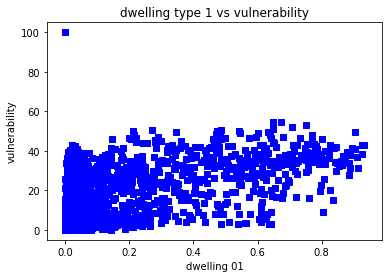

In [16]:
#analyse the most important features
plt.scatter(X.dw_01, Y, c = "blue", marker = "s")
plt.title("dwelling type 1 vs vulnerability")
plt.xlabel("dwelling 01")
plt.ylabel("vulnerability")
plt.show()

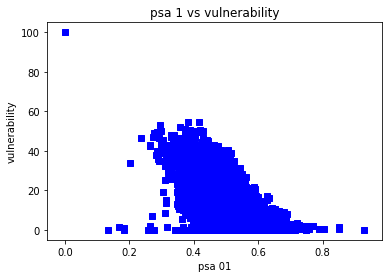

In [17]:
plt.scatter(X.psa_01, Y, c = "blue", marker = "s")
plt.title("psa 1 vs vulnerability")
plt.xlabel("psa 01")
plt.ylabel("vulnerability")
plt.show()

In [18]:
#dealing with outliers
train_data=train_data[train_data.psa_01<0.8]
train_data=train_data[train_data['target_pct_vunerable']<60]
train_data.head()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,13569978,39024030,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,...,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,13593882,32879946,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,...,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,2698300,8261710,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,...,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,1965966,9069776,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,...,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,1852078,9908844,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,...,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [19]:
train_x=train_data[X_features]
train_x.shape


(3169, 24)

In [20]:
train_y=train_data['target_pct_vunerable']

In [21]:


from sklearn.model_selection import GridSearchCV   #Perforing grid search
#for tuning hyperparameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 12.7min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 14.6min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 18.6min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 22.3min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 25.7min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 30.2min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 34.3min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 38.3min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 43.3min
[Parallel(

KeyboardInterrupt: 

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)

In [ ]:
test_data=test_data[X_features]

In [ ]:
test_data['Prediction'] = best_xgb_model.predict(test_data)
filename = 'submission4.csv'
pd.DataFrame({'ward': test.ward, 'target_pct_vunerable': test_data.Prediction}).to_csv(filename, index=False)

In [ ]:
print(test_data['Prediction'].head())
print(test_data['Prediction'].count())